# Trending Movies Dataset (1900–2025)

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("Trending_Movies.csv")

In [3]:
# Checking if the data is uncleaned
print("Dataset Shape:", df.shape)
print("\nColumns and Types:\n",df.dtypes)
print("\nMissing values per column:\n",df.isnull().sum())
print("\nNumber of Duplicated Rows:\n",df.duplicated().sum())
print("\nUnique values per Column:\n",df.nunique())
print("\nNumerical Column Summary:\n",df.describe())
print("\nFull Column Summary:\n",df.describe(include='all'))


Dataset Shape: (10000, 10)

Columns and Types:
 id                     int64
title                 object
original_title        object
overview              object
adult                   bool
original_language     object
popularity           float64
release_date          object
vote_average         float64
vote_count             int64
dtype: object

Missing values per column:
 id                     0
title                  0
original_title         0
overview             253
adult                  0
original_language      0
popularity             0
release_date         156
vote_average           0
vote_count             0
dtype: int64

Number of Duplicated Rows:
 209

Unique values per Column:
 id                   9791
title                9434
original_title       9520
overview             9536
adult                   2
original_language      71
popularity           8955
release_date         6080
vote_average         2781
vote_count           3265
dtype: int64

Numerical Column Summ

| Issue                       | Action                             |
|-----------------------------|------------------------------------|
| 253 missing overviews       | Fill with empty string             |
| 156 missing release_dates   | Drop rows (optional)               |
| 209 duplicate rows          | Drop duplicates                    |
| No negative or weird values | No action needed                   |
| Proper data types mostly    | Convert to datetime                |


# Data Cleaning

This section describes the data cleaning steps I implemented to prepare the dataset for analysis. The goal was to ensure consistency, handle missing data appropriately, and make the dataset suitable for both NLP and time-based analyses.

Below is a detailed explanation of the cleaning operations corresponding to the code:

## 1.Dropping Duplicate Rows

Purpose: Ensure each record in the dataset is unique. Duplicate rows can bias statistics and lead to over-representation of certain observations.

In [5]:
df = df.drop_duplicates()

Result: All duplicate rows were removed. The updated shape of the dataset is printed to verify the change:

In [6]:
print(f"Dataset after removing duplicates: {df.shape}")

Dataset after removing duplicates: (9791, 10)


## 2.Converting release_date to Datetime

Purpose: The release_date column was originally stored as a string, which limits time-based operations (sorting, grouping by year, time series analysis).

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

Note: errors='coerce' ensures invalid date formats are converted to NaT (missing), making them easy to identify and remove.

## 3.Dropping Rows with Missing release_date

Purpose: For time-based analysis, having a valid release_date is essential. Rows missing this information cannot contribute meaningfully to temporal trends or modeling.

In [8]:
df = df.dropna(subset=['release_date'])
print(f"Dataset after dropping missing release_date: {df.shape}")

Dataset after dropping missing release_date: (9639, 10)


Result: Rows with missing release_date were removed, ensuring only valid dates remain.

## 4.Filling Missing Overviews with Empty Strings

Purpose: The overview column is used in NLP tasks. Missing values can cause errors in text processing pipelines.

In [9]:
df['overview'] = df['overview'].fillna('')

Result: All missing overviews were filled with empty strings to maintain consistency and avoid null-related issues in text analysis.

## 5.Resetting the Index

Purpose: After removing rows, the DataFrame index can become non-sequential. Resetting ensures a clean, continuous index.

In [10]:
df.reset_index(drop=True, inplace=True)

Result: Index was reset, dropping the old index to avoid confusion.

## 6.Final Missing Values Check

Purpose: To confirm that critical columns no longer have missing values.

In [11]:
print("\n Final missing values check:", df.isnull().sum())


 Final missing values check: id                   0
title                0
original_title       0
overview             0
adult                0
original_language    0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64


Result: A summary of any remaining missing values is displayed to verify data cleanliness.

# Exploratory Data Analysis (EDA) – Visualization Report

This report summarizes the key insights from visualizing the cleaned movie dataset. The aim was to understand distributions, trends over time, and important categorical breakdowns using Matplotlib and Seaborn.

## 1.Extracting Release Year

Purpose: To enable time-based analysis, it's helpful to have the release year as a separate column.

In [12]:
df['release_year'] = df['release_date'].dt.year

Result: A new column release_year was created, enabling grouping and plotting by year.

## 2.Distribution of Vote Average

Goal: Understand how user ratings (vote averages) are distributed across movies.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

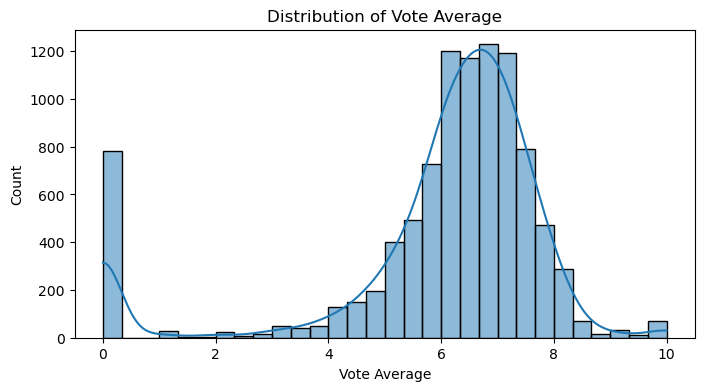

In [14]:
# Vote average distribution
plt.figure(figsize=(8,4))
sns.histplot(df['vote_average'], bins=30, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.show()

1. Most movies receive ratings between 5 and 8, showing a slight right skew.

2. A large number of movies have a zero vote average, likely due to missing or unrated entries.

3. The distribution follows a near-normal curve with a long tail toward the higher ratings.

## 3.Number of Movies Released Per Year

Goal: Analyze the trend in movie production volume across years.

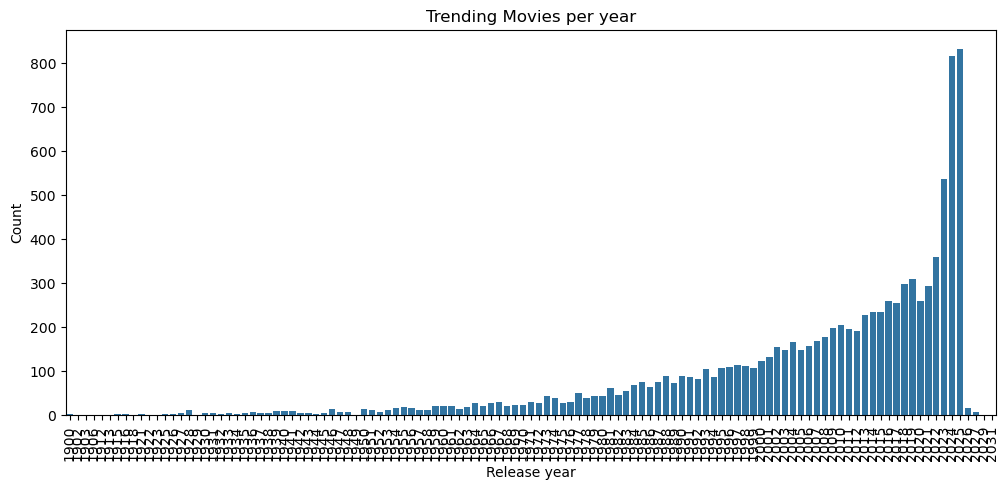

In [15]:
# Number of movies per year
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].unique()))
plt.xticks(rotation=90)
plt.title('Trending Movies per year')
plt.xlabel('Release year')
plt.ylabel('Count')
plt.show()   

1. There is a consistent rise in movie production over time, especially after 2000.

2. A sharp spike is seen in the 2010s, suggesting data availability and global film output both increased.

3. Pre-1950s, very few movies are recorded—indicating either limited data or actual lower production.



# Time-Series Analysis

# 4.Average Popularity Over Time

Goal: Observe how average popularity scores evolved over the decades.

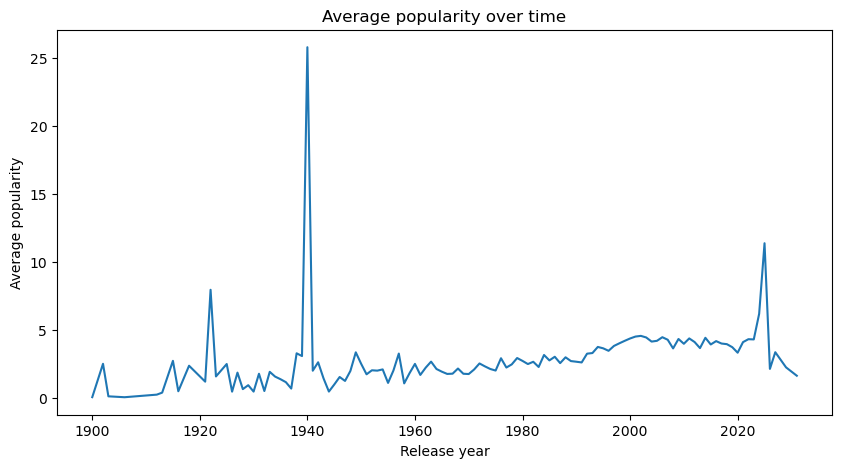

In [16]:
# Average popularity over time
plt.figure(figsize=(10,5))
popularity_trend = df.groupby('release_year')['popularity'].mean().reset_index()
sns.lineplot(data=popularity_trend, x='release_year', y='popularity')
plt.title('Average popularity over time')
plt.xlabel('Release year')
plt.ylabel('Average popularity')
plt.show()

1. The 1940s and 2020s show sudden spikes, possibly due to outlier films with massive popularity scores.

2. Overall, popularity remains fairly stable with slight increases in the modern era, likely due to streaming and marketing reach.

3. A dip is observed post-2020, possibly due to the pandemic's impact on movie releases.

# 5.Top 10 Original Languages

Goal: Identify the most common languages used in the dataset.

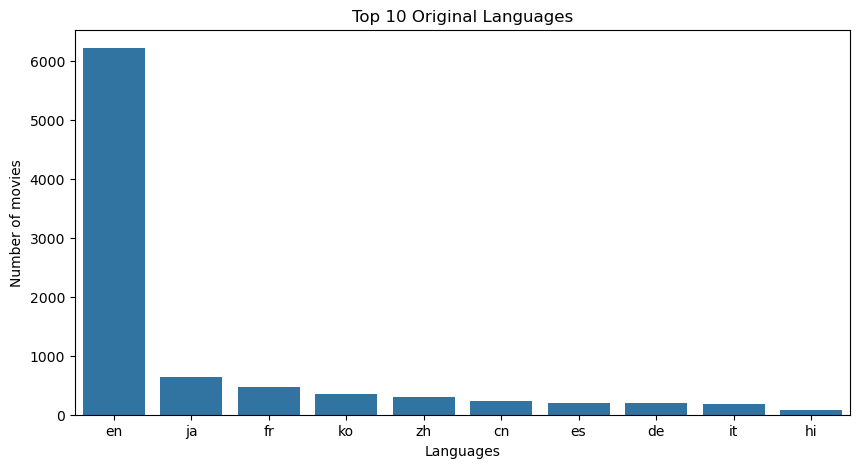

In [17]:
# Top 10 Languages
plt.figure(figsize=(10,5))
top_langs = df['original_language'].value_counts().head(10)
sns.barplot(x=top_langs.index, y=top_langs.values)
plt.title('Top 10 Original Languages')
plt.xlabel('Languages')
plt.ylabel('Number of movies')
plt.show()

1. English ('en') dominates the dataset with a huge margin.

2. Other common languages include Japanese, French, Korean, Chinese, and Spanish, reflecting global contributions.

3. This plot helps identify linguistic diversity and which markets are best represented.

Notes

1. These plots were generated after data cleaning, including fixing date types and handling missing values.

2. To ensure temporal plots were accurate, only movies with valid release_date were used.

# NLP: Word Frequency and Word Cloud

## Text Analysis Report – Movie Overviews

Thisection describes how I performed basic Natural Language Processing (NLP) to explore the overview text data in the movies dataset. The goal was to identify the most frequent words and visualize them using a word cloud for intuitive understanding.

In [18]:
from wordcloud import WordCloud
import nltk
from collections import Counter

## 1.Tokenization and Cleaning

Purpose: Break the movie overviews into individual words (tokens) for analysis.

In [19]:
#Tokenize and clean
nltk.download('punkt')
all_overviews = ''.join(df['overview']).lower()
tokens = nltk.word_tokenize(all_overviews)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lavanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1. Combined all overviews into a single text string.

2. Converted text to lowercase for normalization.

3. Used NLTK's word_tokenize to split text into individual words.

## 2.Filtering Tokens

Purpose: Clean tokens to retain only meaningful words.

In [20]:
tokens = [t for t in tokens if t.isalpha() and len(t) > 3]

1. Removed non-alphabetic tokens (punctuation, numbers).

2. Kept words with length greater than 3 to avoid stop words like the, and, but.

## 3.Word Frequency Analysis

Purpose: Identify the most common words used in movie overviews.

In [21]:

#Top words
word_freq = Counter(tokens)
print("Top 20 most common words:", word_freq.most_common(20))


Top 20 most common words: [('with', 4390), ('that', 2907), ('their', 2850), ('from', 2350), ('they', 2178), ('when', 2012), ('into', 1507), ('life', 1197), ('young', 1170), ('after', 1138), ('world', 1020), ('family', 909), ('this', 894), ('will', 882), ('must', 865), ('have', 789), ('them', 785), ('find', 773), ('love', 709), ('only', 697)]


1. Counted word frequencies across all overviews.

2. Displayed the top 20 most common words to understand key themes in the dataset.

## 4.Word Cloud Visualization

Purpose: Create an intuitive, visual representation of the most frequent words.

In [22]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

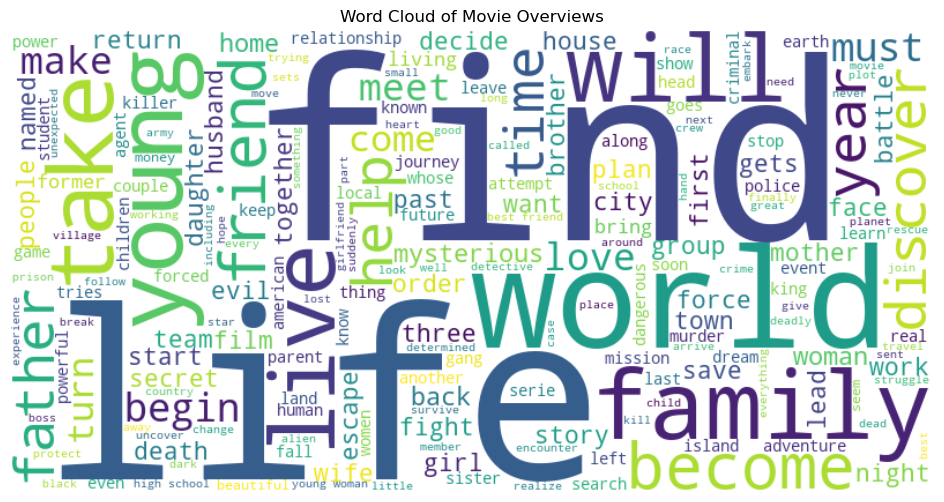

In [23]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Overviews')
plt.show()

1. Generated a word cloud from all filtered tokens.

2. Larger words indicate higher frequency.

Notes:
This simple approach does not remove English stop words (e.g., from, with).

# 🎬 Movie Recommendation System – GUI App

A desktop app built with Tkinter that lets users search for movies by typing natural language keywords.
It uses TF-IDF text vectorization to recommend similar movies based on their overviews.

✅ Features
1. Intuitive GUI built in Tkinter
2. Dark theme with custom colors and fonts
3. Scrollable, formatted results box
4. Emoji-enhanced user experience
5. Content-based recommendations using TF-IDF + Cosine Similarity

## App Structure & Code Overview

In [24]:
import tkinter as tk
from tkinter import scrolledtext
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## 1.Data Preparation

In [25]:
df['overview'] = df['overview'].fillna("")
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])

1. Cleans missing overviews.
2. Converts text to TF-IDF vectors ignoring English stopwords.

## 2.Recommendation Logic

In [26]:
def recommend_movies_by_keywords(keywords, top_n=10):
    query_vec = tfidf.transform([keywords])
    sim_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_indices = sim_scores.argsort()[-top_n:][::-1]
    results = df.iloc[top_indices][['title', 'overview', 'release_date', 'vote_average', 'vote_count']].copy()
    results['similarity_score'] = sim_scores[top_indices]
    return results

1. Transforms the user query with the trained TF-IDF model.
2. Computes cosine similarity to all movie overviews.
3. Returns top N movies ranked by similarity.

## 3.Theming & Styling

In [27]:
BG_COLOR = "#222831"
TEXT_COLOR = "#eeeeee"
ACCENT_COLOR = "#00adb5"
BOX_COLOR = "#393e46"
FONT_NAME = "Helvetica"

1. Dark background
2. Contrasting accent color for buttons and headers
3. Custom fonts

## 4.GUI Components

In [33]:
root = tk.Tk()
root.title("🎬 Movie Recommendation System")
root.configure(bg=BG_COLOR)

# Title Label
title_label = tk.Label(root, text="🎬 Movie Recommendation System", 
                       font=(FONT_NAME, 18, 'bold'),
                       fg=ACCENT_COLOR, bg=BG_COLOR)
title_label.pack(pady=10)

# Instructions
label = tk.Label(root, text="🔎 Enter keywords to search for movies:", 
                  font=(FONT_NAME, 12),
                  fg=TEXT_COLOR, bg=BG_COLOR)
label.pack(pady=5)

# Entry Box
entry_frame = tk.Frame(root, bg=BOX_COLOR, bd=2)
entry_frame.pack(pady=5)
entry = tk.Entry(entry_frame, width=50, font=(FONT_NAME, 12), bg=TEXT_COLOR, fg=BG_COLOR, bd=0)
entry.pack(padx=5, pady=5)

# Search Button
search_button = tk.Button(root, text="🔍 Search", 
                          command=lambda: search_movies(),
                          font=(FONT_NAME, 12, 'bold'),
                          bg=ACCENT_COLOR, fg=BG_COLOR,
                          activebackground=BOX_COLOR, activeforeground=TEXT_COLOR,
                          bd=0, padx=10, pady=5)
search_button.pack(pady=10)

# Results Box
output_box = scrolledtext.ScrolledText(root, 
                                       width=100, height=25,
                                       font=(FONT_NAME, 11),
                                       bg=BOX_COLOR, fg=TEXT_COLOR,
                                       insertbackground=TEXT_COLOR,  # Cursor color
                                       bd=0)
output_box.pack(pady=10)

| Component          | Description                                           |
|---------------------|-------------------------------------------------------|
| Title Label         | App name in bold accent color                        |
| Input Instructions  | User prompt with search                              |
| Entry Box           | Themed text entry field                              |
| Search Button       | Colorful, emoji-enhanced search button               |
| Results Box         | Scrollable, color-coded, emoji-decorated output      |


## 5.Output Formatting

In [34]:
def search_movies():
    user_input = entry.get().strip()
    output_box.delete(1.0, tk.END)
    
    if not user_input:
        output_box.insert(tk.END, "❌ Please enter some keywords!")
        return
    
    results = recommend_movies_by_keywords(user_input, top_n=10)
    
    if results.empty:
        output_box.insert(tk.END, "⚠️ No matching movies found!")
        return
    
    for idx, row in results.iterrows():
        output_box.insert(tk.END, f"🎬 {row['title']} ({row['release_date']})\n", 'title')
        output_box.insert(tk.END, f"⭐ Rating: {row['vote_average']} | Votes: {row['vote_count']}\n", 'rating')
        output_box.insert(tk.END, f"📝 Overview: {row['overview']}\n\n", 'overview')
        output_box.insert(tk.END, "-"*100 + "\n", 'divider')
    
    # Optional: add tags for styling
    output_box.tag_config('title', foreground=ACCENT_COLOR, font=(FONT_NAME, 12, 'bold'))
    output_box.tag_config('rating', foreground='#f8b400', font=(FONT_NAME, 11, 'italic'))
    output_box.tag_config('overview', foreground=TEXT_COLOR)
    output_box.tag_config('divider', foreground=ACCENT_COLOR)

# Run the App
root.mainloop()


1. Movie title in accent color and bold.
2. Ratings in golden color and italics.
3. Overview in clean, light text.
4. Divider lines for readability.

This colorful, themed desktop app brings NLP-powered movie recommendations to life in an easy-to-use GUI.
It’s perfect for anyone who wants to discover movies simply by typing in free-form natural language queries.